In [137]:
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()



ETL

Procedemos a revisar y analizar la data 

Leyendo nuestro dataframe con la libreria pandas

In [138]:
Df = pd.read_csv('D:\Berenice\Modelos\properties_colombia_train.csv', index_col=[0])
Df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,Medellín,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,Bucaramanga,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,Medellín,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


Viendo nuestra correlación
Aquí vamos viendo con que columnas podemos contar para nuestro modelo

In [139]:
Df.corr()

C:\Users\dabec\AppData\Local\Temp\ipykernel_24180\4141696000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.corr()


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,0.348782,-0.090049,-0.087967,-0.078776,-0.014730,-0.002049,-0.004829
lon,0.348782,1.000000,-0.091085,-0.058143,-0.031767,0.009189,-0.005953,0.032939
rooms,-0.090049,-0.091085,1.000000,0.999131,0.664379,0.086619,0.051583,0.178329
bedrooms,-0.087967,-0.058143,0.999131,1.000000,0.579127,0.071450,0.046264,0.121947
bathrooms,-0.078776,-0.031767,0.664379,0.579127,1.000000,0.104708,0.052931,0.443496
surface_total,-0.014730,0.009189,0.086619,0.071450,0.104708,1.000000,0.711513,0.414640
surface_covered,-0.002049,-0.005953,0.051583,0.046264,0.052931,0.711513,1.000000,0.206906
price,-0.004829,0.032939,0.178329,0.121947,0.443496,0.414640,0.206906,1.000000


In [213]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65850 entries, 852569 to 248581
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               65850 non-null  object 
 1   ad_type          65850 non-null  object 
 2   start_date       65850 non-null  object 
 3   end_date         65850 non-null  object 
 4   created_on       65850 non-null  object 
 5   lat              49433 non-null  float64
 6   lon              49433 non-null  float64
 7   l1               65850 non-null  object 
 8   l2               65850 non-null  object 
 9   l3               62193 non-null  object 
 10  l4               15074 non-null  object 
 11  l5               9052 non-null   object 
 12  l6               2364 non-null   object 
 13  rooms            9110 non-null   float64
 14  bedrooms         13403 non-null  float64
 15  bathrooms        52054 non-null  float64
 16  surface_total    2314 non-null   float64
 17  surfac

In [142]:
Df.shape

(197549, 26)

Revisando duplicados
Revisamo y como see ve no contamos con duplicados, pero igual prefiriendo las últimas actualizaciones

In [144]:
Df2= Df.drop_duplicates(['id'], keep='last')

In [145]:
Df2.shape

(197549, 26)

Buscando los nulos
Gracias a esto vamos viendo ya con que columnas nos quedaremos para nuestro modelado

In [146]:
Df2.isnull().sum()

id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
dtype: int64

Basados en nuestros anteriores análisis procedemos a dropear

In [147]:
Df2.drop(columns=['l4', 'l5', 'l6', 'rooms', 'bedrooms', 'created_on', 'surface_total', 'surface_covered', 'price_period'], inplace=True)
Df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197549 entries, 861131 to 448114
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              197549 non-null  object 
 1   ad_type         197549 non-null  object 
 2   start_date      197549 non-null  object 
 3   end_date        197549 non-null  object 
 4   lat             148051 non-null  float64
 5   lon             148051 non-null  float64
 6   l1              197549 non-null  object 
 7   l2              197549 non-null  object 
 8   l3              186517 non-null  object 
 9   bathrooms       156467 non-null  float64
 10  price           197486 non-null  float64
 11  currency        197482 non-null  object 
 12  title           197548 non-null  object 
 13  description     197428 non-null  object 
 14  property_type   197549 non-null  object 
 15  operation_type  197549 non-null  object 
 16  geometry        197549 non-null  object 
dtypes: fl

Y también dropeamos los NaN

In [148]:
Df3= Df2.dropna() 
Df3

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,9.000000e+09,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,6.250000e+08,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,4.200000e+08,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
991390,25/kKYGu15xlIwnX/5zxbg==,Propiedad,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,1.679523e+08,COP,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,Venta,POINT (-75.50680161 5.04900894)
51545,Tk4d+1APd8R7riHpi/dLtg==,Propiedad,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,2.700000e+09,COP,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,Venta,POINT (-74.0821496 4.732379)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418228,v1chkpiecVrlNw1xnDURDQ==,Propiedad,2020-08-11,2020-08-11,4.636047,-74.147480,Colombia,Cundinamarca,Bogotá D.C,2.0,1.950000e+08,COP,APARTAMENTO EN VENTA EN URBANIZACION CASTILLA ...,638-2036 Venta Espectacular Apartamento ubicad...,Apartamento,Venta,POINT (-74.1474797 4.6360473)
976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,1.350000e+08,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,5.200000e+08,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)


Con la data limpia volvemos a verificar nuestra correlación

In [150]:
Df3.corr()

C:\Users\dabec\AppData\Local\Temp\ipykernel_24180\116009410.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df3.corr()


,lat,lon,bathrooms,price
lat,1.000000,0.341201,-0.081606,-0.030286
lon,0.341201,1.000000,-0.032835,0.030783
bathrooms,-0.081606,-0.032835,1.000000,0.434142
price,-0.030286,0.030783,0.434142,1.000000


Con los quartlies voy desarrollando los límites para verificar que los outliers no afecten mi promedio para la clasificación de mi data (caro/barato)

In [154]:
Q1 = Df3['price'].quantile(0.25)

Q3 = Df3['price'].quantile(0.75)

IQR = Q3 - Q1

mediana=Df3['price'].median()

minimo = Df3['price'].min()

maximo = Df3['price'].max()

#Sacando los limitadores para obtener los precio promedio sin outliers

upper = np.where(Df3['price'] >= (Q3+1.5*IQR))  #limite superior para clasificar 

lower = np.where(Df3['price'] <= (Q1-1.5*IQR))   #limite inferior para clasificar




Se genera el precio promedio

In [157]:

sinoutlier=[]
for i in range (len(Df3['price']+1)) :
    if (Df3['price'].values[i] < upper).all and (Df3['price'].values[i] > lower).all:
        sinoutlier.append(Df3['price'].values[i])
    


PrecioPromedio=np.mean(sinoutlier)

In [158]:
PrecioPromedio

543924168.5477479

Clasificamos entre caro(1) y barato(0)

In [ ]:

clasificacion=[]

for i in range (len(Df3["price"]+1)) :
    if Df3["price"].values[i] > PrecioPromedio :
        clasificacion.append(1)
    else:
        Df3["price"].values[i] < PrecioPromedio 
        clasificacion.append(0)

print (clasificacion)

Anexamos nuestra clasificación

In [160]:

Df3['clasificacion'] = clasificacion
Df3

C:\Users\dabec\AppData\Local\Temp\ipykernel_24180\1236769084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df3['clasificacion'] = clasificacion


,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,price,currency,title,description,property_type,operation_type,geometry,clasificacion
Unnamed: 0,,,,,,,,,,,,,,,,,,
861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,9.000000e+09,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,6.250000e+08,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),1
554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,4.200000e+08,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
991390,25/kKYGu15xlIwnX/5zxbg==,Propiedad,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,1.679523e+08,COP,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,Venta,POINT (-75.50680161 5.04900894),0
51545,Tk4d+1APd8R7riHpi/dLtg==,Propiedad,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,2.700000e+09,COP,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,Venta,POINT (-74.0821496 4.732379),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418228,v1chkpiecVrlNw1xnDURDQ==,Propiedad,2020-08-11,2020-08-11,4.636047,-74.147480,Colombia,Cundinamarca,Bogotá D.C,2.0,1.950000e+08,COP,APARTAMENTO EN VENTA EN URBANIZACION CASTILLA ...,638-2036 Venta Espectacular Apartamento ubicad...,Apartamento,Venta,POINT (-74.1474797 4.6360473),0
976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,1.350000e+08,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),0
508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,5.200000e+08,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),0


Pairplot

C:\Users\dabec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\dabec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\dabec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\dabec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\si

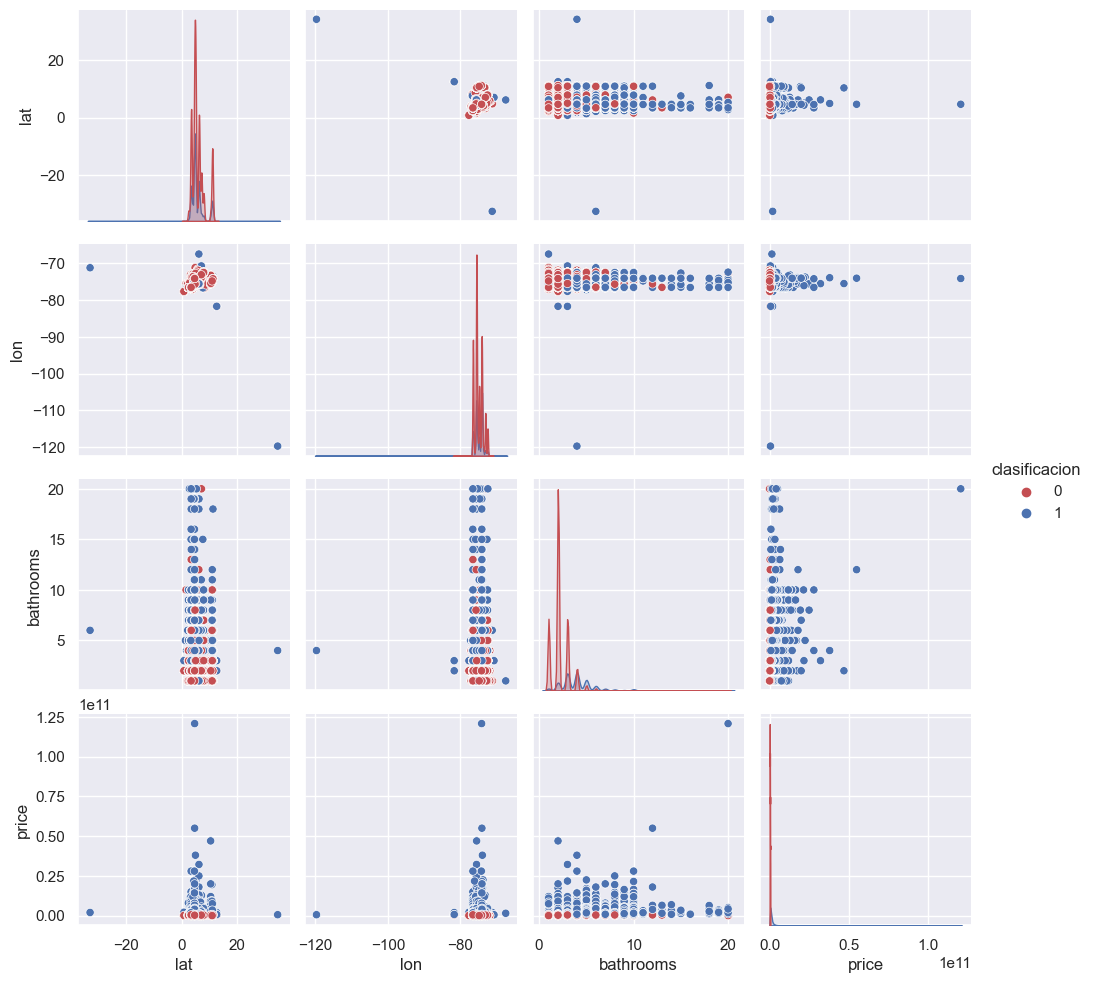

In [161]:
sns.pairplot(Df3, hue="clasificacion", palette = ['r', 'b', 'g'])
plt.show()

Limpiamos el dataset de test

In [172]:

Df_test = pd.read_csv('D:\Berenice\Modelos\properties_colombia_test.csv', index_col=[0])
Df_test.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,COP,NaN,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,Medellín,...,NaN,2793.0,NaN,COP,NaN,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Colombia,Antioquia,Medellín,...,2.0,NaN,NaN,COP,NaN,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY


igual chequeamos nuestra correlación

In [173]:
Df_test.corr()

C:\Users\dabec\AppData\Local\Temp\ipykernel_24180\2437398863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df_test.corr()


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
lat,1.000000,0.358578,-0.072772,-0.071651,-0.073043,0.011162,-0.017371
lon,0.358578,1.000000,-0.079124,-0.035112,-0.019620,-0.023860,-0.028730
rooms,-0.072772,-0.079124,1.000000,0.999697,0.614417,0.050858,-0.012893
bedrooms,-0.071651,-0.035112,0.999697,1.000000,0.584761,0.042362,-0.009013
bathrooms,-0.073043,-0.019620,0.614417,0.584761,1.000000,0.066725,0.001640
surface_total,0.011162,-0.023860,0.050858,0.042362,0.066725,1.000000,0.006079
surface_covered,-0.017371,-0.028730,-0.012893,-0.009013,0.001640,0.006079,1.000000


detallamos la información

In [ ]:
Df_test.info()

In [175]:
Df_test.shape

(65850, 25)

Revisamos nuestro duplicados

In [176]:
Df2_test= Df_test.drop_duplicates(['id'], keep='last')

In [177]:
Df2_test.shape

(65850, 25)

y también nuestros datos nulos

In [ ]:
Df2_test.isnull().sum()

No nos olvidemos de dropear al igual que en el primer dataset para poder contar con la misma variedad de datos

In [179]:
Df2_test.drop(columns=['l4', 'l5', 'l6', 'rooms', 'bedrooms', 'created_on', 'surface_total', 'surface_covered', 'price_period'], inplace=True)
Df2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65850 entries, 852569 to 248581
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              65850 non-null  object 
 1   ad_type         65850 non-null  object 
 2   start_date      65850 non-null  object 
 3   end_date        65850 non-null  object 
 4   lat             49433 non-null  float64
 5   lon             49433 non-null  float64
 6   l1              65850 non-null  object 
 7   l2              65850 non-null  object 
 8   l3              62193 non-null  object 
 9   bathrooms       52054 non-null  float64
 10  currency        65833 non-null  object 
 11  title           65850 non-null  object 
 12  description     65823 non-null  object 
 13  property_type   65850 non-null  object 
 14  operation_type  65850 non-null  object 
 15  geometry        65850 non-null  object 
dtypes: float64(3), object(13)
memory usage: 8.5+ MB


Y finalizamos dropeando los NaN

In [180]:
Df3_test= Df2_test.dropna() 
Df3_test

,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,operation_type,geometry
Unnamed: 0,,,,,,,,,,,,,,,,
852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,3.0,COP,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,6.259253,-75.628381,Colombia,Antioquia,Medellín,1.0,COP,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
859467,du9bOD+E3SCSQMF18AMxkg==,Propiedad,2020-12-14,2020-12-15,3.342859,-76.539523,Colombia,Valle del Cauca,Cali,3.0,COP,"Vendo casa en condominio Caramanta (M,G) _ was...",Vendo casa en condominio Caramanta.En condomin...,Casa,Venta,POINT (-76.5395231 3.342859)
541599,+BhO5B2ZPNw9Mf7kRCYRMw==,Propiedad,2020-11-23,2020-11-24,3.373041,-76.526632,Colombia,Valle del Cauca,Cali,2.0,COP,102182 _ APARTAMENTO VENTA VALPARAISO,"Apartamento con excelente ubicación, rodeado d...",Apartamento,Venta,POINT (-76.5266318 3.3730412)
534941,6EhbufMGfBywhY5mluDxhw==,Propiedad,2020-09-26,2020-10-16,5.076091,-75.514189,Colombia,Caldas,Manizales,2.0,COP,"Casa en Venta puertas del sol, Manizales.","Casa de 2 niveles, excelente ubicacion, excele...",Casa,Venta,POINT (-75.51418903 5.07609147)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859957,9qp58ewdGp19YPrSxDyE7w==,Propiedad,2020-12-14,2020-12-15,11.251933,-73.542358,Colombia,La Guajira,Dibulla,4.0,COP,Se vende casa de playa con vista al mar en Pal...,Casa de en suelo a pocos metros Del Mar Caribe...,Otro,Venta,POINT (-73.54235757 11.25193297)
3156,zmMwn4uzwCf8QCSE4WW7zQ==,Propiedad,2020-10-07,2020-10-07,5.040026,-75.583483,Colombia,Caldas,Manizales,4.0,COP,Venta Casa Campestre La Trinidad _ wasi1571265,"Casa muy amplia e iluminada con 4 alcobas, est...",Otro,Venta,POINT (-75.5834833 5.0400256)
144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,5.041331,-75.512415,Colombia,Caldas,Manizales,1.0,COP,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313)


Iniciamos nuestro modelo de Vecinos más cercanos

Nuestro modelo de clasificación

Trabajamos con el primer dataset para la creación y entrenamiento del modelo

In [199]:
x1 = Df3['lat'].to_numpy()  
x2 = Df3['lon'].to_numpy()
x3 = Df3['bathrooms'].to_numpy()
X= x1,x2,x3
Xf = np.vstack(X).T       # Denotamos X con mayúscula ya que incluye más de un atributo


y = Df3['clasificacion'] # Etiqueta a predecir

Aquí trabajaremos con el segundo dataset  properties_colombia_test.csv

In [200]:
#Definimos variables de test
x4 = Df3_test['lat'].to_numpy()  # Denotamos X con mayúscula ya que incluye más de un atributo
x5 = Df3_test['lon'].to_numpy()
x6 = Df3_test['bathrooms'].to_numpy()
X= x4,x5,x6
Xf_test = np.vstack(X).T

Inicializamos el modelo

In [201]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier()

Dividimos el primer dataset en dos grupos 

In [203]:
from sklearn.model_selection import train_test_split


# Separamos nuestros datos en entrenamiento y test. X se denota con mayúscula ya que incluye dos atributos


X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(76116, 3) (76116,) (32622, 3) (32622,)


In [206]:
# Entrenamos

clf.fit(X_train,y_train)

KNeighborsClassifier()

In [207]:
# Predecimos set de train

y_pred = clf.predict(X_test)

Aquí ya vamos obteniendo los resultados para el segundo dataset

In [208]:
# Predecimos set de test

y_pred_test = clf.predict(Xf_test)

In [209]:
y_pred_test

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Anexamos nuestra predicción

In [210]:
Df3_test['pred']= y_pred_test
Df3_test

C:\Users\dabec\AppData\Local\Temp\ipykernel_24180\3384501194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df3_test['pred']= y_pred_test


,id,ad_type,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,operation_type,geometry,pred
Unnamed: 0,,,,,,,,,,,,,,,,,
852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,3.0,COP,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722),1
119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,6.259253,-75.628381,Colombia,Antioquia,Medellín,1.0,COP,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267),0
859467,du9bOD+E3SCSQMF18AMxkg==,Propiedad,2020-12-14,2020-12-15,3.342859,-76.539523,Colombia,Valle del Cauca,Cali,3.0,COP,"Vendo casa en condominio Caramanta (M,G) _ was...",Vendo casa en condominio Caramanta.En condomin...,Casa,Venta,POINT (-76.5395231 3.342859),1
541599,+BhO5B2ZPNw9Mf7kRCYRMw==,Propiedad,2020-11-23,2020-11-24,3.373041,-76.526632,Colombia,Valle del Cauca,Cali,2.0,COP,102182 _ APARTAMENTO VENTA VALPARAISO,"Apartamento con excelente ubicación, rodeado d...",Apartamento,Venta,POINT (-76.5266318 3.3730412),0
534941,6EhbufMGfBywhY5mluDxhw==,Propiedad,2020-09-26,2020-10-16,5.076091,-75.514189,Colombia,Caldas,Manizales,2.0,COP,"Casa en Venta puertas del sol, Manizales.","Casa de 2 niveles, excelente ubicacion, excele...",Casa,Venta,POINT (-75.51418903 5.07609147),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859957,9qp58ewdGp19YPrSxDyE7w==,Propiedad,2020-12-14,2020-12-15,11.251933,-73.542358,Colombia,La Guajira,Dibulla,4.0,COP,Se vende casa de playa con vista al mar en Pal...,Casa de en suelo a pocos metros Del Mar Caribe...,Otro,Venta,POINT (-73.54235757 11.25193297),1
3156,zmMwn4uzwCf8QCSE4WW7zQ==,Propiedad,2020-10-07,2020-10-07,5.040026,-75.583483,Colombia,Caldas,Manizales,4.0,COP,Venta Casa Campestre La Trinidad _ wasi1571265,"Casa muy amplia e iluminada con 4 alcobas, est...",Otro,Venta,POINT (-75.5834833 5.0400256),1
144249,PmGnbMcvOoweh0wsqAh6dA==,Propiedad,2020-07-27,2020-10-02,5.041331,-75.512415,Colombia,Caldas,Manizales,1.0,COP,APARTAMENTO EN VENTA EN VILLAMARIA VILLAMARIA...,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta,POINT (-75.5124152 5.0413313),0


Y subimos los resultados en unh archivo csv

In [212]:
ruta= 'D:\Berenice\Modelos\DanielaCoVi'

Df3_test['pred'].to_csv(ruta)

Nuestro accuracy

In [167]:
from sklearn.metrics import accuracy_score

# Evaluamos

print(accuracy_score(y,y_pred))

0.93299490518494
